# Classiq 6.12 Advanced Algorithms Design: Quantum Walk on Line Topology

This assignment consists in using the idea behind the lecture of `Quantum Walk` in order to implement the code of the lecture to  design the quantum walk operator for the case of a line with 16 nodes


Before we dive into the structure of the code, we can first understand what is a quantum walk.


---


## The quantum walk

The quantum walk is the counterpart to the classical random walk. A classical random walk is a process in which each sequence or "step" is chosen randomly, such that a particle ("walker") is moved along this steps. Quantum walks are quantum-mechanical implementations of simple random walks. Now for the case of a quantum walk, instead of the particle having a definite interger position, it now has a `superposition` of integer position eigenstates. Furthermore, instead of the classical propabilistic method of adding the resulting value of tossing the coin, we now act on our state with a special operator U in each step. Repeatedly acting on our state with U leads to our “final” distribution.

### The U operator

Each step is carried out by applying the U operator which is defined as follows:

$U = S(C\otimes I$)

We see that U is composed of two operators. The first one is the `coin operator`(C). This operator fans out a state according to its spin by rotating it to an orthegonal state. One of the most commonly used coin operators is the Hadamard operator and since applying this operator leaves us with an equal superposition of states, this type of coin operator is denominated as "fair".

The other operator, S, is our `shift operator` or the conditional transaliton operator. This operator will add one to a position if the spin is up, and subtract one to a position if the spin is down and it is the one that will move our particle.

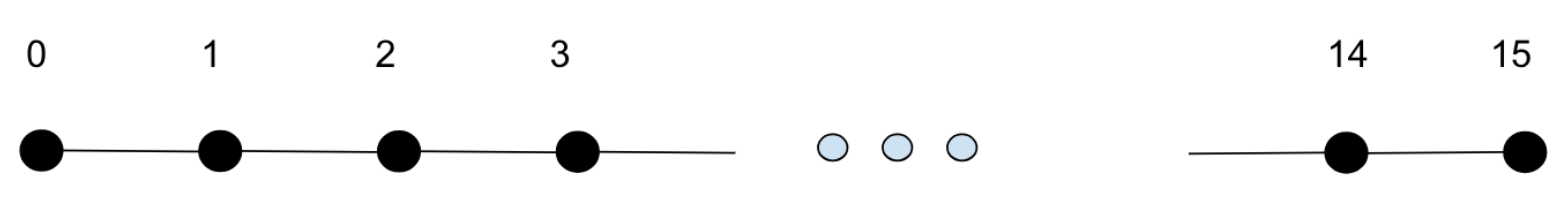

*Image credits: Womanium Quantum + AI 2024*

---



## Advantages of quantum walks

The most important advantage of quantum walks over classical random walsk is their ability to spread faster. Quantum walsk spread cuadratically faster than any classical random walks which means that they present a faster solution to problems solved using a classical random walk.

---

# Code implemented

Now that we have defined what is a quantum walk and some of its principal components, it is time to start laying the foundations for the code needed.

First, as always we need to make sure that all the libraries are inclued and that the Classiq module is installed as well as to guarantee the conecction to our Classiq account.

In [ ]:
!pip install --upgrade classiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.9/387.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.0
    Uninstalling sympy-1.13.0:
      Successf

In [ ]:
from classiq import *
from classiq.qmod.symbolic import logical_or
from classiq.execution import ExecutionPreferences

In [ ]:
import classiq
classiq.authenticate()

Your user code: NRLL-NJGL
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=NRLL-NJGL


Now we begin. The first part will be to define the amount of qubits needed for our particular problem. This is found using the $log_2(16)$ which yields 4. So we need 4 qubits and we have 16 nodes.

In [ ]:
size = 4 #log2(16) = 4

NOTE: The following code, corresponds to the one implemented and show during the bootcamp, the necessary modification will be made to turn this from a quantum walk in a circle, to a quantum walk in a line.

The first part of this algorithm corresponds to what we reffered as the coin operator. This operator defines the probabilities of the walker to move from one node to the other. In the original expample, since we were talking about a circile, all nodes, regradless of the position of the particle are the time, had an equal probability of 0.5.

However, since we are refering to a line in this example then we need to change this probability so that it makes a difference depending on if we are at the begining, middle or end of the line. For the case on which the particle is at the beginning (node 0), then it can *only* go forward so the probability of moving to the right node (node 1) must be 1. A similar case occurs from when we are at the end (node 15), then the particle can only go backwards (node 14). For the nodes in the middle the probabiity to go forward or backwards remains the same as in the case of the circle, meaning it has equal probability of moving up or down the line.


This operator corresponds to the one called. `W_iteration`. The previous steps are preparations of the state and of diffusers that aid the algorithm.


In [ ]:
@qfunc
def minus_state(x: QBit):
  X(x)
  H(x)

@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
    aux^=(x!=0)

@qfunc
def zero_diffuzer(x: QNum):
    aux = QNum('aux')
    allocate(1,aux)
    within_apply(compute=lambda: minus_state(aux),
              action=lambda: diffuzer_oracle)


def W_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    """
    Defines the coin operation for the quantum walk.

    Considering the corrections specified above regarding the beginning and end of the line
    and the probabilities of each case
    """
    prob = [0]*16  # Initialize probability vector for 16 nodes
    if i == 0:
        prob[i + 1] = 1.0  # If at the first node, move to the right node (node 1)
    elif i == 16 - 1:
        prob[i - 1] = 1.0  # If at the last node, move to the left node (node 14)
    else: # Probabilities of moving left or right whenever we are in the middle
        prob[i - 1] = 0.5
        prob[i + 1] = 0.5
    print(f'Node={i}, prob vec ={prob}') #Print of the probability vector of each node
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))

@qfunc
def W_operator(vertices:QNum, adjacent_vertices: QNum):
    """
    Applies the coin operator to all vertices.

    """
    for i in range(size**2):
        W_iteration(i,vertices,adjacent_vertices)

Next we have three other functions. The first one checks if two nodes are adjacent to each other and returns the results. The second swaps the values of two `QArrays` bit by bit. Lastly we have the `S_operator` which wee mentioned in the beginning and whose task is to apply the corresponding operator in order to swap vertices with their adjacent vertices.

In [ ]:
@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
  '''Checks if two vertices are adjacent, this was adjusted from the
  original code since the original code stated that it was adjacent if the sum
  vertices-adjacent_vertices was odd meaning nodes like 0 and 3 could be considered
  adjacent

  Instead, it was changed so that the subtraction gives either 1 or -1 (left or right)'''

  res |= (((vertices-adjacent_vertices)) == 1) | (((vertices-adjacent_vertices)) == -1)

@qfunc
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
  repeat(count= x.len,
    iteration= lambda i: SWAP(x[i],y[i]))

@qfunc
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

Finally, we put together the `main` function which will initialize the circuit as well as the algorithm and carry out the sequence of functions in the order needed.

In [ ]:
@qfunc
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices) #puts all qubits in a superposition
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

Now we create the model and view it on the Classiq IDE.

In [ ]:
# Create and synthesize the quantum model
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Node=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
Node=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
Node=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
Node=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
Node=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
Node=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
Node=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
Node=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0]
Node

We notice at first glance that all probabilities vectors, when we add the probabilities of each node, give back, correctly 1.

# Analizing the results

First we can se the probability vectors corresponding to each node. As we had described, the probabilities vectors for the case in which we are at the beginning or at the end of the line are different than the rest of the cases.

Now, let's observe the circuit obtained.

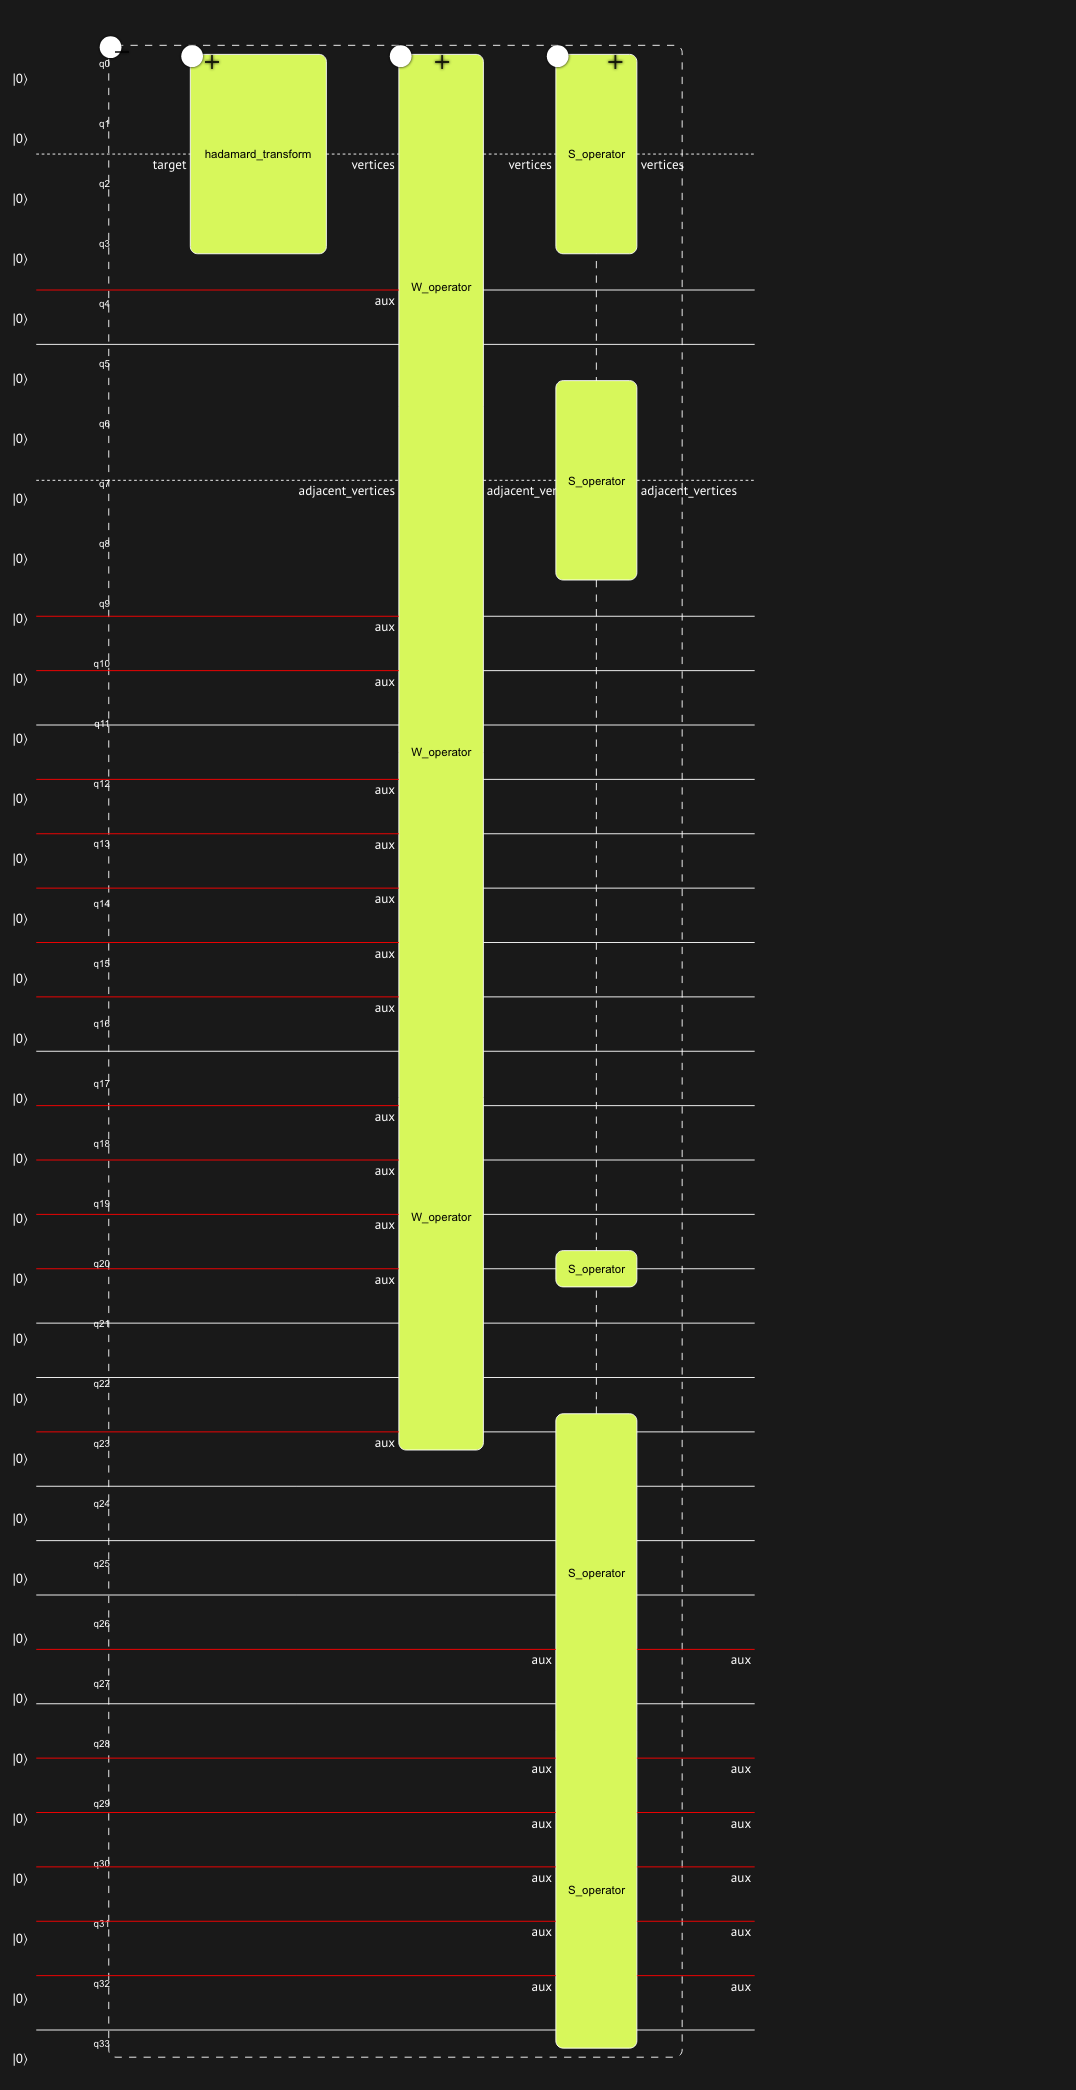


We see that the first step is to create a superposition using a Hadamard gate. Directly afterwars follows a block with the `W_operator` which contains a state preparation blovk which prepares the probabilities for moving to adjacent vertices depending on each node. It si followed by the zero diffuser block that
ensures that the probabilities are correctly distributed. This process is applied in sequence to each node.

Afterwards, we have the `S_operator`, which contains inside the edge operator and the bitewise swap. The edge operator checks if the current vertex and an adjacent vertex are connected by an edge and if so, sets a flag qubit to indicate this. The swap mimics the walker's movement to the adjacent vertex if these vertices are indeed adjacent (so it waits for the result of the edge oracle).

Since the circuit shown here is composed of 33 qubits, it is not possible to run it on Classiq's backends since they have a maximum of 25 qubits. However, the circuit obtained corresponds to what is expected from the program written.


---

In conclusion, through this example we coded a (discrete) Quantum Walk for the case of a line. This example can be extended for any lenght of line as well as to be modified so that it works well with a circle like in the original code. Once a backend is provided that can handle the number of qubits needed then we could observe the results of this type of quantum walk.

# References

Bouche, I. (2021, January 31). Introduction to quantum walks. Medium. https://medium.com/mit-6-s089-intro-to-quantum-computing/introduction-to-quantum-walks-b2f741dc5c87